In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns

from pandas_profiling import ProfileReport

In [2]:
df = pd.read_csv('_202206_freq_event_table_test__20220912220214.csv', infer_datetime_format=True)

In [3]:
report1 = ProfileReport(df)

In [4]:
report1.to_file("202206_freq_event_table_test.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df1 = pd.read_csv('_202206_indicatorvalues_fbr_pivot__20220912233108.csv', infer_datetime_format=True)


In [6]:
report2 = ProfileReport(df1)

In [7]:
report2.to_file("202206_indicatorvalues_fbr.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/hermanoferreira/opt/miniconda3/envs/data.venv/lib/python3.9/site-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
fbr_histogram_june = df1.hist(column='freq_base_response')

In [11]:
%matplotlib inline
print(fbr_histogram_june)

[[<AxesSubplot:title={'center':'freq_base_response'}>]]


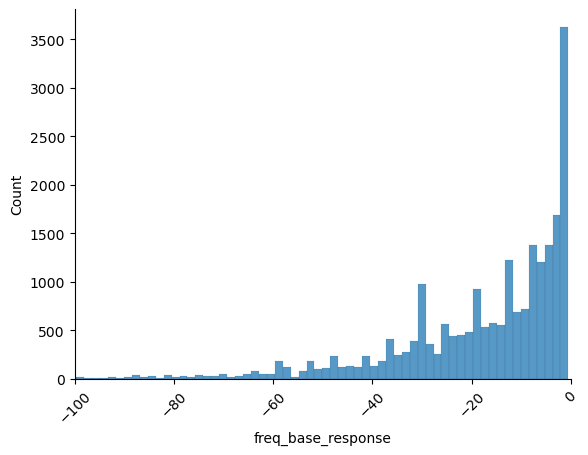

In [53]:
fbr_hist_plot_june = sns.histplot(data=df1, x='freq_base_response')
plt.pyplot.xlim(- 100, 0)
plt.pyplot.xticks(rotation=45)
fbr_hist_plot_june.spines['top'].set_visible(False)
fbr_hist_plot_june.spines['right'].set_visible(False)
fbr_hist_plot_june.autoscale_view()

In [16]:
print(df['freq_base_response'].median())
print(df['freq_base_response'].mean())
print(df['freq_base_response'].max())
print(df['freq_base_response'].min())
print(df['freq_base_response'].mode())

-12.003750271267368
-18.477769728670214
-0.4748874240451464
-998.8659328884548
0   -2.021959
Name: freq_base_response, dtype: float64


In [17]:
groups=df['time_difference'].gt('00:00:02').cumsum()
df2 = df

In [18]:
df2['CumSum'] = groups

In [19]:
df3 = df2['CumSum'].value_counts()

In [20]:
df5 = df3.multiply(2)

In [21]:
print(df5.median())
print(df5.mean())
print(df5.max())
print(df5.min())
print(df5.mode())

4.0
10.13820018365473
534
2
0    2
Name: CumSum, dtype: int64


In [22]:
print(df5.value_counts())

2      1828
4       900
6       526
8       286
10      149
       ... 
168       1
170       1
172       1
182       1
100       1
Name: CumSum, Length: 96, dtype: int64


In [23]:
df4 = df5.value_counts()


(0.0, 50.0)

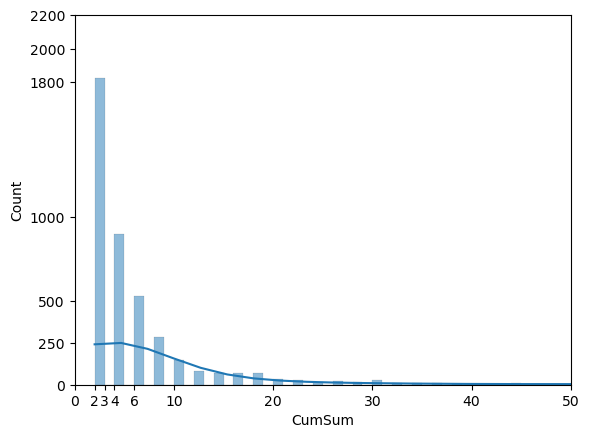

In [25]:
%matplotlib inline
sns.histplot(data=df5, bins=50, binwidth=1, kde=True)
plt.pyplot.yticks([0, 250, 500, 1000, 1800, 2000,2200])
plt.pyplot.xticks([0, 2, 3, 4, 6, 10, 20, 30, 40, 50])
plt.pyplot.xlim(0,50)